In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "CGxhnEQwmi5QJl69NiqmkhEdw"
Consumer_Secret_Key = "WubfToWPZhwxEHlmRwaPUFS8cZpwHDsD1jNxdg8v1L4ejIefbW"
Access_Token = "1334735354927071232-IqStzBg2yJSPripFOKvggD1cb0mOTE"
Access_Token_Secret = "6fm8Fm2ZcUAxJq1yrMEkNdv95no6mkRoCS6Xk80ysPdFs"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="ShopeeID", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @prkjimivn Skuyyyy pantengin yaa kak :)^IQ

2) @LostGalaxy_7 Yuhuy Kak hehe :) ^DP

3) @glacepsh aziyapppp semangat bgt kak yuhuu 😍 kalo mau tau bgt capcus kepoin postingan mimin dongss 😉^TS

4) @myjake02 Amiin paling serius dari aku Kak hehe :) ^DP

5) @starryjakeu Kalo penasaran, mampir ke postingan mimin setelah ini yups kak😆 ^JK



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@prkjimivn Skuyyyy pantengin yaa kak :)^IQ
1,@LostGalaxy_7 Yuhuy Kak hehe :) ^DP
2,@glacepsh aziyapppp semangat bgt kak yuhuu 😍 k...
3,@myjake02 Amiin paling serius dari aku Kak heh...
4,"@starryjakeu Kalo penasaran, mampir ke posting..."


In [ ]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Skuyyyy pantengin yaa kak :)^IQ
1,_7 Yuhuy Kak hehe :) ^DP
2,aziyapppp semangat bgt kak yuhuu 😍 kalo mau t...
3,2 Amiin paling serius dari aku Kak hehe :) ^DP
4,"Kalo penasaran, mampir ke postingan mimin set..."
...,...
195,eeee ayam eee ayam hihi gitu yah kak kagetnya...
196,7clv 7clv Apa ya kak? Hehe.. Cuss meluncur ke ...
197,Coba tebak dong 😋^VZ
198,"wahduu kaa.. Mimin ga ikut2n deh, cuman bsa d..."


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Skuyyyy pantengin yaa kak :)^IQ,1.0,0.5
1,_7 Yuhuy Kak hehe :) ^DP,1.0,0.5
2,aziyapppp semangat bgt kak yuhuu 😍 kalo mau t...,0.0,0.0
3,2 Amiin paling serius dari aku Kak hehe :) ^DP,1.0,0.5
4,"Kalo penasaran, mampir ke postingan mimin set...",0.0,0.0
...,...,...,...
195,eeee ayam eee ayam hihi gitu yah kak kagetnya...,1.0,0.5
196,7clv 7clv Apa ya kak? Hehe.. Cuss meluncur ke ...,0.0,0.0
197,Coba tebak dong 😋^VZ,0.0,0.0
198,"wahduu kaa.. Mimin ga ikut2n deh, cuman bsa d...",1.0,0.5


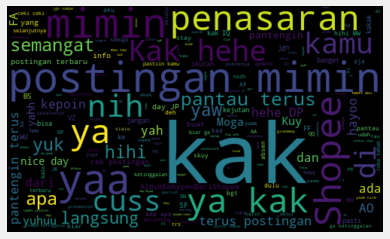

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Skuyyyy pantengin yaa kak :)^IQ,1.0,0.5,Positive
1,_7 Yuhuy Kak hehe :) ^DP,1.0,0.5,Positive
2,aziyapppp semangat bgt kak yuhuu 😍 kalo mau t...,0.0,0.0,Neutral
3,2 Amiin paling serius dari aku Kak hehe :) ^DP,1.0,0.5,Positive
4,"Kalo penasaran, mampir ke postingan mimin set...",0.0,0.0,Neutral
...,...,...,...,...
195,eeee ayam eee ayam hihi gitu yah kak kagetnya...,1.0,0.5,Positive
196,7clv 7clv Apa ya kak? Hehe.. Cuss meluncur ke ...,0.0,0.0,Neutral
197,Coba tebak dong 😋^VZ,0.0,0.0,Neutral
198,"wahduu kaa.. Mimin ga ikut2n deh, cuman bsa d...",1.0,0.5,Positive


In [ ]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _JAKE Hai kak, jgn sedih. Smua pemilihan dilakukan secara random yaw, yuk kepoin trs update inpo dr mimin. Sehat slalu yah 😊^BS



In [ ]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1)  Skuyyyy pantengin yaa kak :)^IQ

2) _7 Yuhuy Kak hehe :) ^DP

3) 2 Amiin paling serius dari aku Kak hehe :) ^DP

4)  Cuakepp kak, mangat terus dan semoga beruntung yeah :) ^GT

5)  Huhuhu pantengin terus postingan mimin yaa kak :)^IQ

6)  Mau tau ga nie maksud mimin apa, skuy ceki ceki postingan mimin ya, jangan ketinggalan kjutan dari Shopee yaa :)^SF

7)  Wahh kece bngt nih semangat kamu kaa.. Moga nyangkut nih di kamu :D ^AO

8)  Waaah knapa ga bisa Kak, cuss ikutin S&amp;Knya yaaw hehe :) ^DP

9)   Apa hayoo kak~ hehe.. Yukk meluncur pantau postingan dari  yaaw. Have a nice day😊 ^JP

10)  Hehehehe ada2 aja nich kak, stand by shopee yah kak :)^FA

11)  Wew mantul nih, semangat ya kakak 😀 good luck! semoga harimu menyenangkan! ✨ ^BS

12)  yuhuu, ada yang penasaran nih hihi. skuy kak pantau terus socmed shopee yaaw :) ^VA

13) 21 Ntabss kak, mangat terus dan ikuti giveawaynya di sosmed resmi Shopee. Maaciw :) ^GT

14) 2 Tjakep Kak, moga kamu bisa beruntu

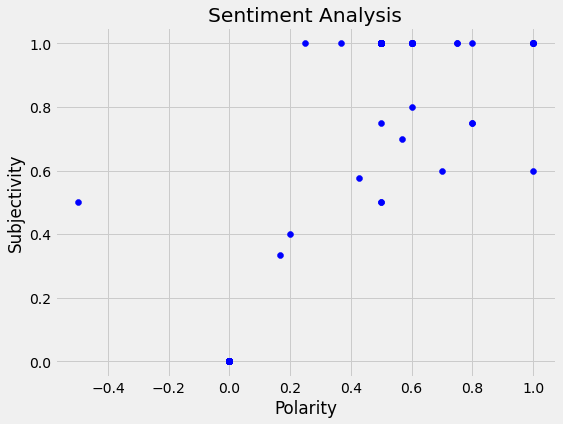

In [ ]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

61.5

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Positive    123
Neutral      76
Negative      1
Name: Analysis, dtype: int64

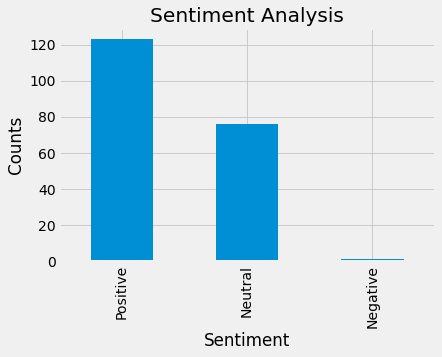

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

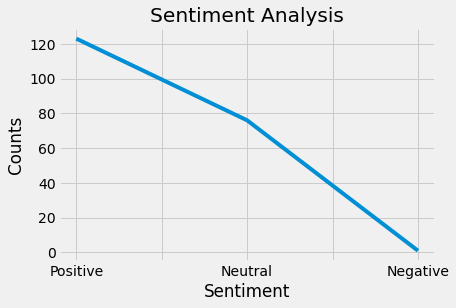

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()